In [198]:
#importar librerias para limpieza de data
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [188]:
#Generar la ruta a el archivo CSV
FILE_NAME = "Forbes 2000 2022.csv"
PATH_TO_DATA_SET = "Data_set"

cdw = os.getcwd()
file_path = os.path.join(cdw, PATH_TO_DATA_SET, FILE_NAME)


In [189]:
#importar el archivo CSV, limpiar la col vacia y renombrar las columnas
forbes22 = pd.read_csv(file_path,encoding= 'UTF_8',sep=';')
forbes22 = forbes22.drop("Unnamed: 7",axis=1)
forbes22.columns = ['Rank', 'Company Name', 'Country', 'Sales', 'Profits', 'Assets', 'Market_Value']

In [190]:
#comprobación de los tipos de datos, veridicación de NAN y  '-'
forbes22.info()
forbes22.isna().any()
forbes22.isin(['-']).any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Company Name  2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profits       2000 non-null   object
 5   Assets        2000 non-null   object
 6   Market_Value  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


Rank            False
Company Name    False
Country         False
Sales           False
Profits         False
Assets          False
Market_Value    False
dtype: bool

In [191]:
#limpieza de las columnas numericas y transformacion a tipo float

numeric_cols =['Sales','Profits','Assets', 'Market_Value']
forbes22[numeric_cols]  = forbes22[numeric_cols].replace('[^0-9]', '', regex=True).astype(float)
#verificacion de cambio
forbes22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Company Name  2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         2000 non-null   float64
 4   Profits       2000 non-null   float64
 5   Assets        2000 non-null   float64
 6   Market_Value  2000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.5+ KB


In [192]:
#calculos numericos con loa data limpia
forbes22['Sales'].count(), forbes22['Sales'].mean(), forbes22['Sales'].std(), forbes22['Sales'].var() 


(2000, 23876.035, 40943.9022916259, 1676403134.8662083)

In [193]:
#comprobra de la cantidad de valores vacios
forbes22.isna().sum()

Rank            0
Company Name    0
Country         0
Sales           0
Profits         0
Assets          0
Market_Value    0
dtype: int64

In [203]:
print(np.percentile(forbes22['Profits'],[25,50,75]))

forbes22['Profits'].quantile([0.25,0.5,0.75])

[ 653. 1120. 2390.]


0.25     653.0
0.50    1120.0
0.75    2390.0
Name: Profits, dtype: float64

In [197]:
# Valorar el 1% de las empresas con mas ganancias en el mundo /percentil 99

p99p = np.percentile(forbes22['Profits'],99)
p99p

23635.099999999995

In [200]:
#definimos algunos nombres de paises de sur america, para filtrarlos del data set
suda = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Uruguay','Venezuela']
f_suda = forbes22[forbes22['Country'].isin(suda)]

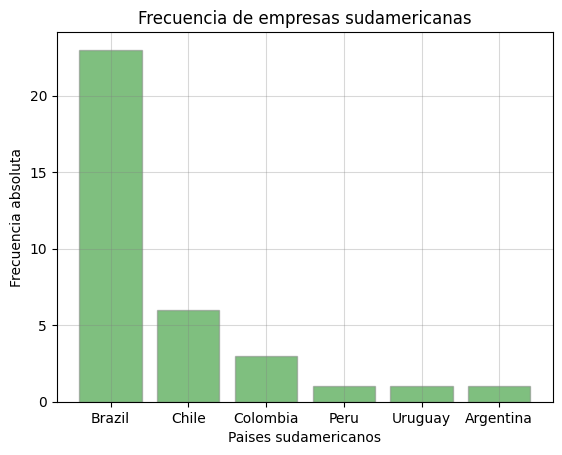

In [212]:
# Bar plot
table_suda=f_suda['Country'].value_counts()
table_suda

plt.bar(table_suda.index,table_suda.values, color = 'green', alpha = 0.8, edgecolor = 'gray') #Crea el gráfico de barras
plt.title('Frecuencia de empresas sudamericanas')
plt.xlabel('Paises sudamericanos')
plt.ylabel('Frecuencia absoluta')
plt.grid(color = 'gray',alpha = 0.3, linestyle = 'solid')

plt.show() #Imprime el gráfico